  3%|▎         | 1/29 [00:00<00:03,  7.65it/s]

False
1    150
0    150
Name: HeartDisease, dtype: int64
     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
194 0.62 1.00             0.75 0.62         0.45          1.00         0.00   
255 0.92 0.00             0.50 0.80         0.54          0.00         0.00   
68  0.57 0.00             0.75 0.59         0.43          0.00         0.00   
39  0.62 1.00             1.00 0.61         0.39          0.00         1.00   
265 0.68 1.00             0.75 0.86         0.35          1.00         0.00   

     Max HR  Exercise angina  ST depression  Slope of ST  \
194    0.87             0.00           0.00         0.33   
255    0.80             0.00           0.06         0.33   
68     0.74             0.00           0.05         0.67   
39     0.92             0.00           0.00         0.33   
265    0.80             0.00           0.08         0.33   

     Number of vessels fluro  Thallium  HeartDisease  
194                     0.67      0.43          0.00

100%|██████████| 29/29 [00:00<?, ?it/s]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'LGBMClassifier'),
  Text(1, 0, 'LabelPropagation'),
  Text(2, 0, 'XGBClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'DecisionTreeClassifier'),
  Text(5, 0, 'ExtraTreeClassifier'),
  Text(6, 0, 'ExtraTreesClassifier'),
  Text(7, 0, 'LabelSpreading'),
  Text(8, 0, 'BaggingClassifier'),
  Text(9, 0, 'AdaBoostClassifier'),
  Text(10, 0, 'SVC'),
  Text(11, 0, 'NuSVC'),
  Text(12, 0, 'KNeighborsClassifier'),
  Text(13, 0, 'QuadraticDiscriminantAnalysis'),
  Text(14, 0, 'LogisticRegression'),
  Text(15, 0, 'CalibratedClassifierCV'),
  Text(16, 0, 'LinearSVC'),
  Text(17, 0, 'BernoulliNB'),
  Text(18, 0, 'GaussianNB'),
  Text(19, 0, 'RidgeClassifier'),
  Text(20, 0, 'RidgeClassifierCV'),
  Text(21, 0, 'LinearDiscriminantAnalysis'),
  Text(22, 0, 'NearestCentroid'),
  Text(23, 0, 'SGDClassifier'),
  Text(24, 0, 'Perceptron'),
  Text(25, 

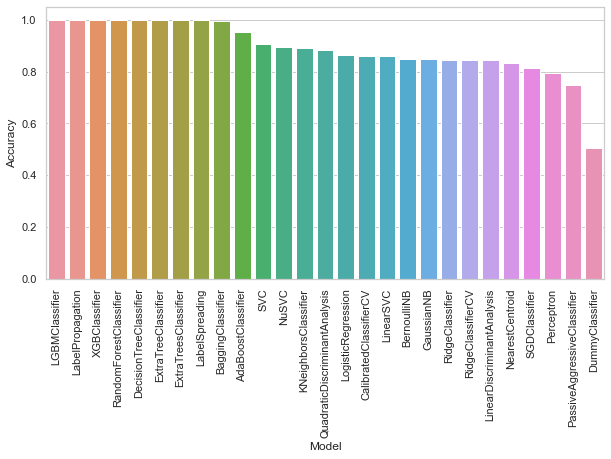

In [8]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import  train_test_split
from  sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns



data = pd.read_csv("Heart_Disease_Prediction.csv")
# print(data.shape)
# print(data.head())

print(data.isnull().values.any())
data=data.drop_duplicates()

data.HeartDisease = [1 if i == "Presence" else 0 for i in data.HeartDisease]

data= shuffle(data)

# class_le = LabelEncoder()
# y = class_le.fit_transform(data.HeartDisease.values)

data_majority = data[data.HeartDisease == 0]
data_minority =  data[data.HeartDisease == 1]
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=150,    # to match majority class
                                 random_state=123) # reproducible results


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print(df_upsampled.HeartDisease.value_counts())
# print(df_upsampled.head())



# copy the data
df_max_scaled = df_upsampled.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
print(df_max_scaled.head())





x=df_max_scaled.drop(['HeartDisease'],axis=1)
y=df_max_scaled.HeartDisease.values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


from lazypredict.Supervised import LazyClassifier

import lazypredict

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(x_train, x_train, y_train, y_train)
models_test,predictions_test = clf.fit(x_train, x_test, y_train, y_test)
models_train

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)